# Estimador de máxima verossimilhança da distribuição Poisson
Neste notebook do Jupyter vamos demonstrar a dedução matemática do estimador de máxima verossimilhança do parâmetro da distribuição Poisson. Para ver os resultados dos comandos de cada etapa coloque o mouse ao lado esquerdo da célula que tem os comandos e clique em 'Run this cell'
## Preparação
Antes de começar importamos a biblioteca de matemática simbólica do Python. Ela permite criar expressões, como funções e suas derivadas, e manipulá-las simbolicamente.

In [1]:
from sympy import *
init_printing()

## A função de densidade probabilística
Para uma dada observação $x_i$ a função de massa da distribuição Poisson é

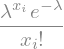

In [2]:
x, L, i, n = symbols('x \lambda i n')
f = L**(Indexed(x,i))*exp(-L)*1/factorial(Indexed(x,i))
f

## Defina a função de log-verossimilhança negativa
É a soma dos logarítimos dos valores da função acima sobre todos os valores dos dados ($x_i$). Primeiro calculamos o logarítmo da função de massa:

In [3]:
lf = ln(f)
lf=expand_log(lf, force=true)
lf

e em seguida definimos a sua soma sobre todos os valores de $x_i$

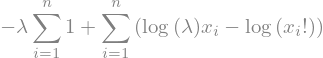

In [4]:
LL = Sum(lf, (i,1,n))
LL=simplify(LL)
LL

O somatório $\sum_{i=1}^n 1$ nada mais é que $n$. Substituímos isto na função obtida acima temos a função de log-verossimilhança:

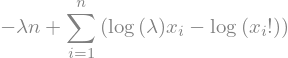

In [5]:
g=Sum(1, (i,1,n))
LL=LL.subs(g,n)      
LL

## Estimativa de máxima verossimilhança (mle)
É o valor do parâmetro $\lambda$ que maximiza a função de log-verossimilhança (ou minimiza a de log-verossimilhança negativa). Sabemos que as funções têm derivadas zero em seus pontos máximos e mínimos.
Então o truque para achar a expressão do mle é encontrar a expressão para o valor de $\lambda$
que faz a derivada da função de log-verossimilhança ser igual a zero. São duas etapas:

### Calcule a derivada da função de log-verossimlhança em relação ao parâmetro
Antes de calcular a derivada temos que substituir o fatorial $x_i!$ pela sua expressão contínua $\Gamma (x_i+1)$

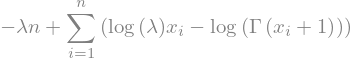

In [6]:
LL=simplify(LL)
LL

E agora usamos o comando 'diff' para obter a derivada da log-verossimilhança em função do parâmetro $\lambda$:

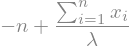

In [7]:
dLL = diff(LL,L)
dLL=simplify(expand(dLL))
dLL

### Resolvemos a derivada para o parâmetro
Agora igualamos a derivada da função de log-verossimilhança negativa a zero e resolvemos esta equação para o parãmetro $\lambda$:

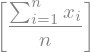

In [8]:
solve(dLL,L)

Que nada mais é que a média amostral!